In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df = pd.read_csv("employee-earnings-report-2023.csv")

In [3]:
df.head()

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION,TOTAL GROSS,POSTAL
0,"Demesmin,Stanley",Boston Police Department,Police Lieutenant (Det),145775.26,NaN,6053.17,221579.41,NaN,23862.0,29155.26,426425.10,02052
1,"Hosein,Haseeb",Boston Police Department,Police Captain/DDC,162823.73,NaN,165669.88,34154.37,NaN,5472.0,40706.02,408826.00,02186
2,"Conway,Kendra J",Boston Police Department,Police Officer,359942.30,NaN,48651.28,NaN,NaN,NaN,NaN,408593.58,02465
3,"Smith,Sean P",Boston Police Department,Police Lieutenant,142535.62,NaN,20368.37,152031.33,NaN,51646.0,35633.88,402215.20,02186
4,"Danilecki,John H",Boston Police Department,Police Captain,162326.64,NaN,24504.13,96954.98,NaN,61512.0,40581.57,385879.32,02559


In [4]:
len(df)

25812

In [5]:
unique = df["NAME"].nunique()

In [6]:
print(unique)

25740


In [7]:
df = df.drop_duplicates(subset="NAME")
print(len(df))

25740


In [8]:
df.head()

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION,TOTAL GROSS,POSTAL
0,"Demesmin,Stanley",Boston Police Department,Police Lieutenant (Det),145775.26,NaN,6053.17,221579.41,NaN,23862.0,29155.26,426425.10,02052
1,"Hosein,Haseeb",Boston Police Department,Police Captain/DDC,162823.73,NaN,165669.88,34154.37,NaN,5472.0,40706.02,408826.00,02186
2,"Conway,Kendra J",Boston Police Department,Police Officer,359942.30,NaN,48651.28,NaN,NaN,NaN,NaN,408593.58,02465
3,"Smith,Sean P",Boston Police Department,Police Lieutenant,142535.62,NaN,20368.37,152031.33,NaN,51646.0,35633.88,402215.20,02186
4,"Danilecki,John H",Boston Police Department,Police Captain,162326.64,NaN,24504.13,96954.98,NaN,61512.0,40581.57,385879.32,02559


In [9]:
missing_only = df[df.columns[df.isnull().any()]].isnull().sum()
print(missing_only)

REGULAR             2232
RETRO              11177
OTHER               8397
OVERTIME           18449
INJURED            24582
DETAIL             23585
QUINN_EDUCATION    24425
POSTAL                63
dtype: int64


In [10]:
df = df.drop(columns = "QUINN_EDUCATION")


In [11]:
df = df.drop(columns = "TOTAL GROSS")

In [12]:
filtered_df = df[df['REGULAR'].notna()]

In [13]:
len(filtered_df)

23508

In [14]:
df = df[df['REGULAR'].notna()]


In [15]:
df = df[df['OTHER'].notna()]

In [16]:
len(df)

16752

In [17]:
df = df[df['POSTAL'].notna()]

In [18]:
len(df)


16710

In [19]:
missing_only = df[df.columns[df.isnull().any()]].isnull().sum()
print(missing_only)

RETRO        6923
OVERTIME    10247
INJURED     15840
DETAIL      14664
dtype: int64


In [20]:
cols_to_convert = ['REGULAR','RETRO','OTHER','OVERTIME','INJURED','DETAIL','POSTAL']
df[cols_to_convert] = df[cols_to_convert].replace(',', '', regex=True).apply(pd.to_numeric, errors='coerce')

In [21]:
missing_only = df[df.columns[df.isnull().any()]].isnull().sum()
print(missing_only)

RETRO        6923
OVERTIME    10247
INJURED     15840
DETAIL      14664
dtype: int64


In [22]:
df = df[df['POSTAL'].notna()]

In [23]:
missing_only = df[df.columns[df.isnull().any()]].isnull().sum()
print(missing_only)

RETRO        6923
OVERTIME    10247
INJURED     15840
DETAIL      14664
dtype: int64


In [24]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
import numpy as np

data = df

categorical_cols = data.select_dtypes(exclude=['number']).columns
numeric_cols = data.select_dtypes(include=['number']).columns
categorical_data = data[categorical_cols]
mice_imputer = IterativeImputer(random_state=0, max_iter=20)
imputed_numeric = pd.DataFrame(
    mice_imputer.fit_transform(data[numeric_cols]),
    columns=numeric_cols
)


imputed_numeric = imputed_numeric.clip(lower=0)




mode_imputer = SimpleImputer(strategy='most_frequent')
imputed_categorical = pd.DataFrame(
    mode_imputer.fit_transform(categorical_data),
    columns=categorical_cols
)

imputed_data = pd.concat([imputed_categorical,imputed_numeric], axis=1)


missing_summary = pd.DataFrame({
    "Missing Before": data.isnull().sum(),
    "Missing After": imputed_data.isnull().sum()
})

df = imputed_data


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [25]:
missing_only = df[df.columns[df.isnull().any()]].isnull().sum()
print(missing_only)

Series([], dtype: float64)


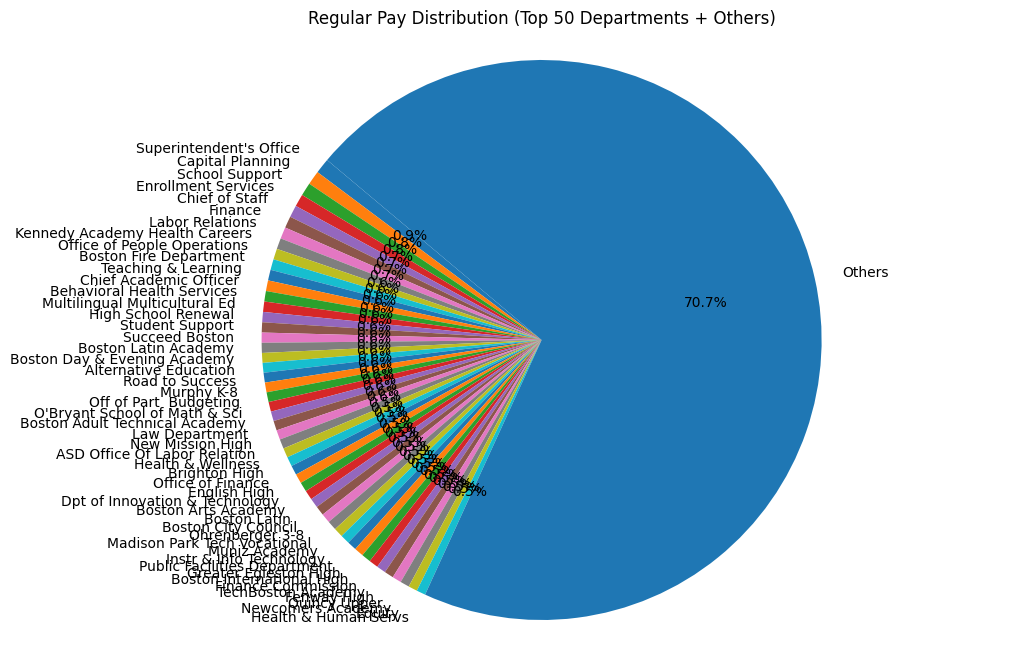

In [26]:
dept_pay = df.groupby('DEPARTMENT_NAME')['REGULAR'].mean().sort_values(ascending=False)

top_n=50
top_dept = dept_pay.head(top_n)
others = pd.Series({'Others': dept_pay.iloc[top_n:].sum()})
dept_pie = pd.concat([top_dept, others])

plt.figure(figsize=(12, 8))
plt.pie(dept_pie, labels=dept_pie.index, autopct='%1.1f%%', startangle=140)
plt.title('Regular Pay Distribution (Top 50 Departments + Others)')
plt.axis('equal')
plt.show()

In [27]:
df['DEPARTMENT_NAME'].value_counts()

,count
DEPARTMENT_NAME,
Boston Police Department,2590
Boston Fire Department,1719
Food & Nutrition Services,544
Facilities Management,496
BPS Substitute Teachers/Nurs,491
...,...
Off of Part Budgeting,1
Legal Advisor,1
Advancement & External Affairs,1


In [28]:
df = df[(df != 0).all(axis=1)]

In [29]:
len(df)

14004

In [30]:
df.to_csv("cleaned_data_test.csv",index=False)

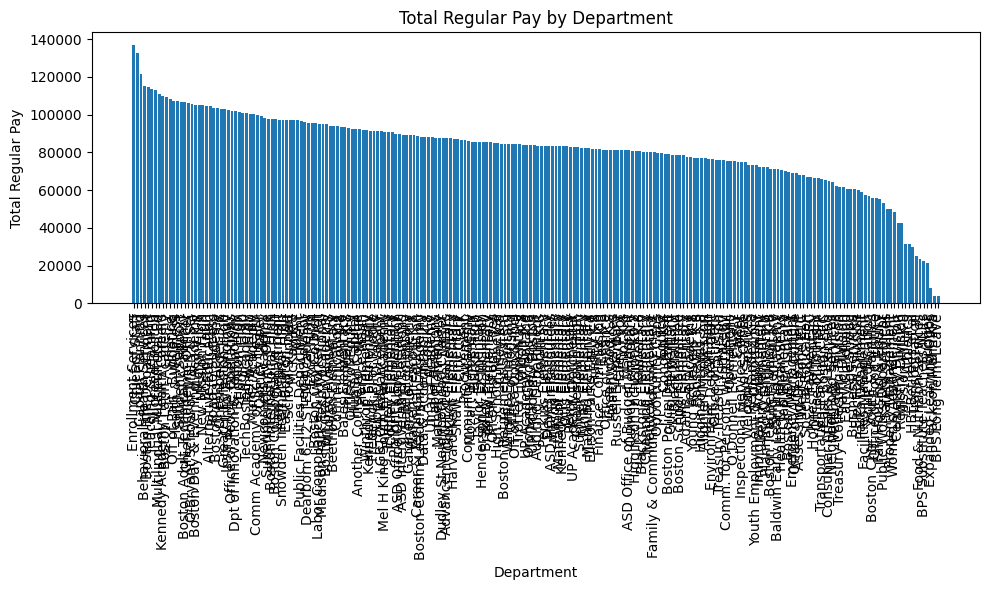

In [31]:
import matplotlib.pyplot as plt
dept_pay = df.groupby('DEPARTMENT_NAME')['REGULAR'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
plt.bar(dept_pay.index, dept_pay.values)
plt.xticks(rotation=90)
plt.xlabel("Department")
plt.ylabel("Total Regular Pay")
plt.title("Total Regular Pay by Department")
plt.tight_layout()
plt.show()